In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn import svm

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

In [7]:
def encode_pop(row_val):
    if(row_val=="CEU"):
        return 0
    elif(row_val=="YRI"):
        return 1
    elif(row_val=="ASW"):
        return 2

In [8]:
raw_file = pd.read_csv('C://Users//ghai7c//Desktop//random_forests//no_NAs_A.raw', sep=" ",nrows=268)

In [9]:
raw_file.head(3)

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs12565286_C,rs12082473_A,rs3094315_G,rs2286139_T,...,rs5770820_A,rs9628187_T,rs6010063_A,rs715586_T,rs8137951_A,rs3810648_G,rs3865766_C,rs2238837_C,rs34726907_T,rs28729663_A
0,NA06984,NA06984,0,0,0,-9,0,0,0,2,...,0,0,2,0,0,0,2,0,0,0
1,NA06985,NA06985,0,0,0,-9,0,0,0,2,...,1,0,0,0,2,1,0,1,1,1
2,NA06986,NA06986,0,0,0,-9,0,0,0,2,...,0,1,1,0,1,0,2,0,0,0


In [10]:
raw_file = raw_file.drop(raw_file.columns[[0,1,2,3,4,5]],axis=1)

In [11]:
raw_file.head(3)

,rs12565286_C,rs12082473_A,rs3094315_G,rs2286139_T,rs11240776_G,rs2980319_A,rs2980300_C,rs2905036_C,rs11240777_G,rs4245756_T,...,rs5770820_A,rs9628187_T,rs6010063_A,rs715586_T,rs8137951_A,rs3810648_G,rs3865766_C,rs2238837_C,rs34726907_T,rs28729663_A
0,0,0,0,2,0,0,2,0,1,0,...,0,0,2,0,0,0,2,0,0,0
1,0,0,0,2,0,0,2,0,2,0,...,1,0,0,0,2,1,0,1,1,1
2,0,0,0,2,0,0,2,0,2,0,...,0,1,1,0,1,0,2,0,0,0


In [12]:
snps = list(raw_file.columns.values)

In [13]:
pops = pd.read_csv('C://Users//ghai7c//Desktop//random_forests//pop_names', sep=" ",nrows=268)

In [14]:
pops = pops.drop('IID',axis=1)

In [15]:
pops['pop1'] = pops['pop'].apply(encode_pop)

In [16]:
X = raw_file.as_matrix(columns=None)

In [17]:
y = np.array(pops['pop1'])

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [19]:
print("Number of Samples used for Training:",len(X_train))

Number of Samples used for Training: 214


In [20]:
kernels = ['linear','poly','rbf','sigmoid']
kernel_scores,kernel_nsvms = [],[]

In [21]:
#validating kernels
for kernel in kernels:
    model = svm.SVC(kernel=kernel)
    model.fit(X_train,Y_train)
    kernel_scores.append(model.score(X_test,Y_test))
    kernel_nsvms.append(len(model.support_vectors_))

In [22]:
kernel_scores

[0.98148148148148151,
 0.83333333333333337,
 0.85185185185185186,
 0.83333333333333337]

In [23]:
kernel_nsvms

[214, 214, 214, 214]

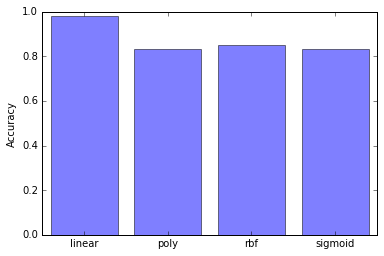

In [24]:
y_pos = np.arange(len(kernels))
plt.bar(y_pos,kernel_scores,align='center',alpha=0.5)
plt.xticks(y_pos,kernels)
plt.ylabel('Accuracy')
plt.show()

In [25]:
C_values = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1.0,10,100,1000]
C_scores,C_nsvms= [],[]

In [26]:
for val in C_values:
    model = svm.SVC(C=val,kernel="linear")
    model.fit(X_train,Y_train)
    C_nsvms.append(len(model.support_vectors_))
    C_scores.append(model.score(X_test,Y_test))

In [27]:
C_scores

[0.83333333333333337,
 0.98148148148148151,
 0.98148148148148151,
 0.98148148148148151,
 0.98148148148148151,
 0.98148148148148151,
 0.98148148148148151,
 0.98148148148148151,
 0.98148148148148151,
 0.98148148148148151]

In [28]:
C_nsvms

[214, 214, 214, 214, 214, 214, 214, 214, 214, 214]

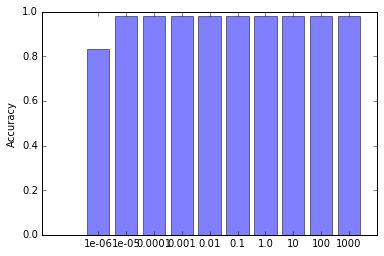

In [29]:
y_pos = np.arange(len(C_values))
plt.bar(y_pos,C_scores,align='center',alpha=0.5)
plt.xticks(y_pos,C_values)
plt.ylabel('Accuracy')
plt.show()

In [29]:
default_gamma = float(1/len(snps))

In [31]:
gammas = [default_gamma,10,100]
gamma_scores = []

In [32]:
for gamma in gammas:
    model = svm.SVC(C=10,kernel="rbf",gamma=gamma)
    model.fit(X_train,Y_train)
    gamma_scores.append(model.score(X_test,Y_test))

In [33]:
gamma_scores

[0.90740740740740744, 0.42592592592592593, 0.42592592592592593]

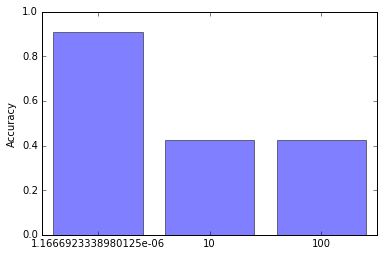

In [34]:
y_pos = np.arange(len(gammas))
plt.bar(y_pos,gamma_scores,align='center',alpha=0.5)
plt.xticks(y_pos,gammas)
plt.ylabel('Accuracy')
plt.show()

In [54]:
final_model = svm.SVC(C=0.00001,kernel="linear",decision_function_shape='ovo')
final_model.fit(X_train,Y_train)

SVC(C=1e-05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
final_model.classes_

array([0, 1, 2], dtype=int64)

In [56]:
len(final_model.support_vectors_)

214

In [57]:
weights = final_model.coef_

In [58]:
weights_model0 = np.array(weights[0])
weights_model1 = np.array(weights[1])
weights_model2 = np.array(weights[2])
weights_model0 = np.abs(weights_model0)
weights_model1 = np.abs(weights_model1)
weights_model2 = np.abs(weights_model2)

In [78]:
#def getImportance(score1,score2,score3):
    #if(score1>0 and score2>0 and score3>0):
        #return "YES"
    #else:
        #return "NO"

In [79]:
#weights_df = pd.DataFrame()

In [80]:
#weights_df["SNPS"] = snps
#weights_df["MODEL_1"] = weights_model0
#weights_df["MODEL_2"] = weights_model1
#weights_df["MODEL_3"] = weights_model2

In [81]:
#weights_df["IMPORTANCE"] = weights_df.apply(lambda row: getImportance(row["MODEL_1"],row["MODEL_2"],row["MODEL_3"]), axis=1)

In [83]:
#important_snps_df = weights_df[weights_df["IMPORTANCE"]=="YES"]

In [101]:
model1_snps_dict,model2_snps_dict,model3_snps_dict = {},{},{}

In [102]:
i=0
for i in range(len(snps)):
    model1_snps_dict[snps[i]] = weights_model0[i]
    model2_snps_dict[snps[i]] = weights_model1[i]
    model3_snps_dict[snps[i]] = weights_model2[i]

In [105]:
sorted_model1_snps = sorted(model1_snps_dict, key=lambda x: model1_snps_dict[x], reverse=True)
sorted_model2_snps = sorted(model2_snps_dict, key=lambda x: model2_snps_dict[x], reverse=True)
sorted_model3_snps = sorted(model3_snps_dict, key=lambda x: model3_snps_dict[x], reverse=True)

In [119]:
def get_top_snps(threshold):
    top_model1 = set(sorted_model1_snps[:threshold])
    top_model2 = set(sorted_model2_snps[:threshold])
    top_model3 = set(sorted_model3_snps[:threshold])
    top_snps = set.intersection(top_model1,top_model2,top_model3)
    return top_snps

In [126]:
top_snps = get_top_snps(5000)
len(top_snps)

54

In [127]:
fw = open("svm_snps_top5k.txt","w")
for snp in top_snps:
    fw.write(snp)
    fw.write('\n')
fw.close()

In [128]:
top_snps = get_top_snps(10000)
len(top_snps)

214

In [129]:
fw = open("svm_snps_top10k.txt","w")
for snp in top_snps:
    fw.write(snp)
    fw.write('\n')
fw.close()